## Vector arithmetic exercises
To build intution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Addition and subtraction
Adding two vectors in numpy is easy. The "+" and "-" operators perform elementwise addition and subtraction, resp.

For what it's worth, we can visualize these vectors, and simple operations on them, using "quiver"

In [2]:
##assign arbitrary values
x = np.array([3.2, 2.])
x_color = np.array([.8,.3,.6])  ##pink vector
y = np.array([4.8, -3])
y_color = np.array([.2,.6,.8])  ##blue vector


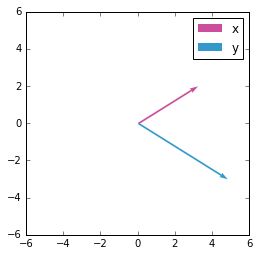

In [3]:
##plot using quiver
plt.quiver(x[0],x[1],angles='xy', scale_units ='xy',scale=1,color=x_color, label='x')
plt.quiver(y[0],y[1],angles='xy', scale_units ='xy',scale=1,color=y_color, label='y')
plt.ylim([-6,6])
plt.xlim([-6,6])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()


x: [ 3.2  2. ]
y: [ 4.8 -3. ]
x+y: [ 8. -1.]


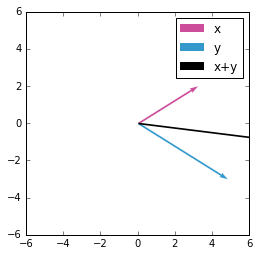

In [4]:
##plot x, y, x+y
z = x+y
print 'x: %s' %(x,)
print 'y: %s' %(y,)
print 'x+y: %s' %(z,)
plt.quiver(x[0],x[1],angles='xy', scale_units ='xy',scale=1,color=x_color, label='x')
plt.quiver(y[0],y[1],angles='xy', scale_units ='xy',scale=1,color=y_color, label = 'y')
plt.quiver(z[0],z[1],angles='xy', scale_units ='xy',scale=1,color=np.array([0,0,0]), label='x+y')
plt.ylim([-6,6])
plt.xlim([-6,6])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()


x: [ 3.2  2. ]
y: [ 4.8 -3. ]
x-y: [-1.6  5. ]


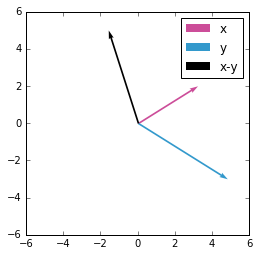

In [5]:
##plot x, y, x-y
z = x-y
print 'x: %s' %(x,)
print 'y: %s' %(y,)
print 'x-y: %s' %(z,)
plt.quiver(x[0],x[1],angles='xy', scale_units ='xy',scale=1,color=x_color, label='x')
plt.quiver(y[0],y[1],angles='xy', scale_units ='xy',scale=1,color=y_color, label='y')
plt.quiver(z[0],z[1],angles='xy', scale_units ='xy',scale=1,color=np.array([0,0,0]), label='x-y')
plt.ylim([-6,6])
plt.xlim([-6,6])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

#### Exercise
Summing vectors in series to generate a trajectory through space

Suppose $\mathbf{x}_0 = (1,0)$. Write a $\mathbf{for}$ loop that performs a series of vector addtions according to the following rule:

$\mathbf{x}_{t+1} = \mathbf{x}_{t}+\lambda \mathbf{x}^{\perp}_{t}$

where $\mathbf{x}^{\perp}$ is perpendicular to $\mathbf{x}$ and $\lambda$ is called the "step-size".

In two dimensions, to obtain $\mathbf{x}^{\perp}$ simply swap vector elements, then negate the first element:

$\mathbf{x}^{\perp} = \left (-x_2, x_1 \right )$

Start by iterating for 10,000 steps, with a step size of 0.2. What trajectory is traced out by this procedure? How will the tajectory change as the step size is reduced?

$\textit{Hint}$: your solution should look like this: https://www.youtube.com/watch?v=FdCy6MGOVfw

In [6]:
### your code here

### Dot products and matrix multiplication
Every array comes with its own "dot" method

In [7]:
print x.dot(y)

9.36


When "x" is a matrix the "dot" method gives us matrix multiplication, as we expect

In [8]:
x1 = np.random.random((10,10))
x2 = np.ones((10,1))
x3 = x1.dot(x2)
print x3
print 'dimensions of x3: %s' %(x3.shape,)

[[ 6.44295747]
 [ 5.17113226]
 [ 5.27039533]
 [ 5.9528443 ]
 [ 4.16764413]
 [ 6.3933392 ]
 [ 3.40044532]
 [ 4.41237124]
 [ 4.36010574]
 [ 5.19035111]]
dimensions of x3: (10, 1)


If dimensions don't match up, "dot" will complain. For example, if the inner dimension of "x" and the outer dimension of "y" don't match:

In [9]:
x1.dot(x2.T)  #y.T is (1,10)

ValueError: shapes (10,10) and (1,10) not aligned: 10 (dim 1) != 1 (dim 0)

Be careful! The "*" operator in numpy performs elementwise multiplication. For matrix multiplication, use "dot".

#### Exercise
Use quiver to plot $\mathbf{x}$, $\mathbf{y}$, and the vector $\mathbf{z}=\mathbf{y}\dfrac{\mathbf{x}\cdot \mathbf{y}}{\lvert \lvert \mathbf{y} \rvert \rvert^2}$ for some arbitrary $2D$ vectors $\mathbf{x}$ and $\mathbf{y}$. 

In [ ]:
##your code here

##### Exercise
Using matrix multiplication to rotate a vector

We learned that matrix-vector multiplication is like taking the dot product of the vector with each row of the matrix.

We also learned that taking the dot product of a vector with two unit-length, orthogonal *coordinate* vectors gives the vector's location in space.

We can use these facts to rotate a 2D vector through any angle. To do so, we rotate the coordinate vectors, and then project our vector onto them.

Suppose our coordinate vectors are the rows on a matrix $W$:

$W = \begin{smallmatrix} cos(\theta)&sin(\theta)\\ -sin(\theta)&cos(\theta) \end{smallmatrix}$

Write a function that generates such a matrix, given an argument $\theta$.

For a few values of theta, show that the length of each row is one, and that the rows are orthogonal to each other.

Use "quiver" to plot the rows of $W$ for various values of the angle $\theta$.

Rotate the vector $\mathbf{x} = \left (1,1 \right ) $ by multiplying it by $W$. Use quiver to plot the results.

In [ ]:
### your code here